In [1]:
import numpy as np

# Data points
x1 = np.array([0, 0])
x2 = np.array([1, 0])
x3 = np.array([0, 1])
x4 = np.array([1, 1])

data_points = np.array([x1, x2, x3, x4])

data_points

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [2]:
# Initial centers
c1_init = x1.copy()
c2_init = x2.copy()

centers_init = np.array([c1_init, c2_init])
centers_init

array([[0, 0],
       [1, 0]])

### (i) ###

In [3]:
def k_means(data_points, centers_init, n_clusters, max_iterations=100, tol=1e-4) :
  
  centers = centers_init.copy() # Make a copy of the initial centers

  for _ in range(max_iterations): #The underscore _ is a throwaway variable, meaning “I don’t care about the loop variable.”
    
    # Compute squared Euclidean distances to each centroid
    # Result shape: (n_samples, k)
    distances = np.linalg.norm(data_points[:, np.newaxis] - centers, axis=2)

    # Assign each point to the index of the closest centroid
    closest_centroids = np.argmin(distances, axis=1) # Finds the index of the minimum value along each row

    # Update centroids to be the mean of the data points assigned to them
    new_centers = np.zeros((n_clusters, data_points.shape[1])) # Initialize new centers
    for i in range(n_clusters):
      new_centers[i] = data_points[closest_centroids == i].mean(axis=0)
    
    # End if centroids no longer change
    if np.linalg.norm(new_centers - centers) < tol:
      break
    centers = new_centers
  return centers, closest_centroids

In [4]:
# distances = np.linalg.norm(data_points[:, np.newaxis] - centers, axis=2)
# break step by step
print(data_points[:, np.newaxis]) #add a new axis between the two existing ones.
data_points[:, np.newaxis].shape

[[[0 0]]

 [[1 0]]

 [[0 1]]

 [[1 1]]]


(4, 1, 2)

In [5]:
# distances = np.linalg.norm(data_points[:, np.newaxis] - centers, axis=2)
# break step by step
# NumPy automatically broadcasts centers along the second axis of data_points
data_points[:, np.newaxis] - centers_init

array([[[ 0,  0],
        [-1,  0]],

       [[ 1,  0],
        [ 0,  0]],

       [[ 0,  1],
        [-1,  1]],

       [[ 1,  1],
        [ 0,  1]]])

In [6]:
# distances = np.linalg.norm(data_points[:, np.newaxis] - centers, axis=2)
# break step by step
#computes the L2 norm along axis 2 
np.linalg.norm(data_points [:, np.newaxis] - centers_init, axis=2)

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 1.41421356],
       [1.41421356, 1.        ]])

In [7]:
centers, labels = k_means(data_points, centers_init, n_clusters=2)
print("Converged centers :", centers)
print("cluster Labels :", labels)

Converged centers : [[0.  0.5]
 [1.  0.5]]
cluster Labels : [0 1 0 1]


Text(0.5, 1.0, 'K-Means Clustering')

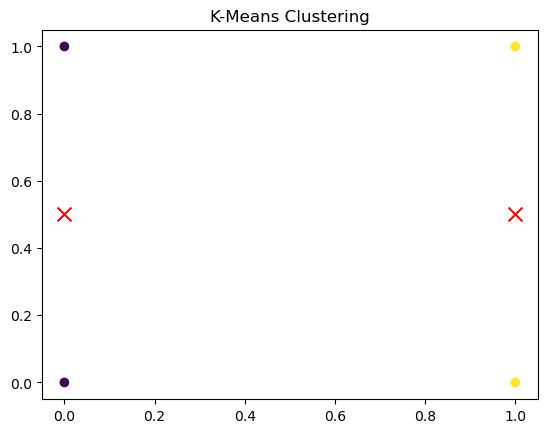

In [8]:
#plot the data
from matplotlib import pyplot as plt
plt.scatter(data_points[:, 0], data_points[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-Means Clustering')

Use sklearn's libraries

In [9]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init=centers_init, max_iter=100, n_init=1) 
#n_init: The number of times the KMeans algorithm will run with different centroid seeds
#        Setting n_init=1 means it will only run once, using the given centers_init
kmeans.fit(data_points)
print("KMeans centers from sklearn:", kmeans.cluster_centers_)
print("KMeans labels from sklearn:", kmeans.labels_)

KMeans centers from sklearn: [[0.  0.5]
 [1.  0.5]]
KMeans labels from sklearn: [0 1 0 1]


c:\Users\milic\anaconda3\envs\ee2213\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\milic\anaconda3\envs\ee2213\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\milic\anaconda3\envs\ee2213\lib\subprocess.py", line 493, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\milic\anaconda3\envs\ee2213\lib\subprocess.py", line 858, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\milic\anaconda3\envs\ee2213\lib\subprocess.py", line 1327, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(exec

### (ii) ###

In [10]:
# Assignment Step: Fix centers, update membership
def update_membership(data_points, centers, fuzzier=2):
    '''
    Parameters:
        datapoints: ndarray of shape (n_samples, n_features)
        centers: ndarray of shape (n_clusters, n_features)
        fuzzier: fuzzifier ([1.25,2])
        
    Returns:
        W: ndarray of shape (n_samples, n_clusters)
    '''
    n_samples = data_points.shape[0]
    n_clusters = centers.shape[0]
    W = np.zeros((n_samples, n_clusters)) # initialize membership matrix

    for i in range(n_samples):
        for k in range(n_clusters):
            denom = 0.0 # Denominator for membership calculation

            # Calculate ||x_i - c_k||
            dist_k = np.linalg.norm(data_points[i] - centers[k]) + 1e-10  # Avoid division by zero

            for j in range(n_clusters):
                # Calculate ||x_i - c_j||
                dist_j = np.linalg.norm(data_points[i] - centers[j]) + 1e-10
    
                ratio = (dist_k / dist_j)
                denom += ratio ** (2 / (fuzzier - 1))
            W[i, k] = 1 / denom
    return W

In [11]:
# Centroid Update Step: Fix membership, update centers
def update_centers(data_points, W, fuzzier=2):
    '''
    Parameters:
        datapoints: ndarray of shape (n_samples, n_features)
        W: ndarray of shape (n_samples, n_clusters)
        fuzzier: fuzzifier ([1.25,2])
        
    Returns:
        centers: ndarray of shape (n_clusters, n_features)
    '''
    n_clusters = W.shape[1]
    centers = np.zeros((n_clusters, data_points.shape[1]))

    for k in range(n_clusters):
        numerator = data_points.T @ (W[:, k] ** fuzzier)
        denominator = np.sum(W[:, k] ** fuzzier)
        centers[k] = numerator / denominator
    return centers

In [12]:
# Fuzzy_Cmeans Clustering
def fuzzy_Cmeans(data_points, centers_init, fuzzier=2, max_iterations=100, tol=1e-4):
  centers = centers_init.copy() # make a copy of initial center to work on.
  for _ in range(max_iterations): # The underscore _ is a throwaway variable, meaning “I don’t care about the loop variable.”
    
    W = update_membership(data_points, centers, fuzzier)
    
    new_centers = update_centers(data_points, W, fuzzier=2)

    if np.linalg.norm(new_centers - centers) < tol:
      break
    centers = new_centers
  return centers, W

In [13]:
centers, W = fuzzy_Cmeans(data_points, centers_init)
print("Converged centers :", centers)
print("Final membership matrix (W):", W)

Converged centers : [[0.04491027 0.4998801 ]
 [0.95508973 0.4998801 ]]
Final membership matrix (W): [[0.82185166 0.17814834]
 [0.17814834 0.82185166]
 [0.82174252 0.17825748]
 [0.17825748 0.82174252]]
